In [4]:
import pickle 
import numpy as np 
from ecog_utils import erp_util
import matplotlib.pyplot as plt
from scipy.stats import zscore
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 8})#, 'font.sans-serif': 'Arial'})
plt.rcParams.update({'font.sans-serif':'Arial'})
import matplotlib as mpl
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
plt.rcParams['svg.fonttype'] = 'none'
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
source_path = './source_data/ED_8/'
spk_counts = pd.read_csv(f'{source_path}/sw.csv')
spks_pre = pd.read_csv(f'{source_path}/ad.csv')
spk_counts.to_csv('./statistical_source/ED8/panele.csv')
spks_pre.to_csv('./statistical_source/ED8/panelf.csv')


[Text(0.5, 0, 'Neuronal activity (Z)'),
 Text(0, 0.5, 'Preceeding slow\n wave magnitude (Z)')]

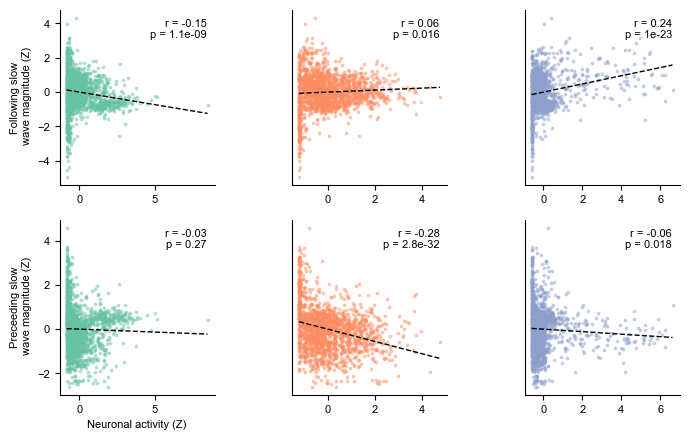

In [5]:
from scipy.stats import pearsonr,spearmanr
fig, axs = plt.subplots(2, 3, figsize=(8, 5), gridspec_kw={'wspace': 0.5})
pal = sns.color_palette('Set2')
a = 0.4
### [-0.35,0.35]
# 0.25 --> -0.05
# 0.14 --> 0.24
# Define your X and Y pairs
data_pairs = [
    (zscore(spk_counts.RS_spikes.values), spk_counts.aftergoing_sw, axs[0, 0], pal[0]),
    (zscore(spk_counts.FS_spikes.values), spk_counts.aftergoing_sw, axs[0, 1], pal[1]),
    (zscore(spk_counts.Lateact_spikes.values), spk_counts.aftergoing_sw, axs[0, 2], pal[2]),
    (zscore(spks_pre.RS_spikes.values), spks_pre.antecedent_def, axs[1, 0], pal[0]),
    (zscore(spks_pre.FS_spikes.values), spks_pre.antecedent_def, axs[1, 1], pal[1]),
    (zscore(spks_pre.Lateact_spikes.values), spks_pre.antecedent_def, axs[1, 2], pal[2]),
]

for i, (x, y, ax, color) in enumerate(data_pairs):
    ax.scatter(x, y, alpha=a, s=3, color=color)

    # Compute Spearman correlation
    rho, p = pearsonr(x, y)

    # Add correlation annotation
    ax.annotate(f'r = {rho:.2f}\np = {p:.2g}', 
                xy=(0.95, 0.95), xycoords='axes fraction',
                ha='right', va='top', fontsize=8)

    # Fit and plot best fit line
    m, b = np.polyfit(x, y, 1)
    x_fit = np.linspace(np.min(x), np.max(x), 100)
    y_fit = m * x_fit + b
    ax.plot(x_fit, y_fit, 'k--', linewidth=1)

    # Remove yticks for right columns
    if i % 3 != 0:
        ax.set(yticks=[])

axs[0,0].set(xlabel='',ylabel='Following slow\n wave magnitude (Z)')
axs[1,0].set(xlabel='Neuronal activity (Z)',ylabel='Preceeding slow\n wave magnitude (Z)')
#plt.savefig('./slow_wave/corrs.jpg',dpi=300,bbox_inches='tight')
#plt.tight_layout()


In [6]:
d = np.load(f'{source_path}/ex_traces.npz')
act = d['act']
supp = d['supp']
t_ar = d['t_ar']

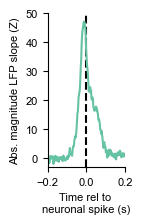

In [7]:
fig,ax = plt.subplots(figsize=(1,2))
plt.plot(t_ar,act,color=sns.color_palette('Set2')[0])
ax.set(xlim=[-0.2,0.2],xlabel='Time rel to \nneuronal spike (s)',ylabel='Abs. magnitude LFP slope (Z)',ylim=[-3,50])
ax.axvline(0,color='k',linestyle='--',zorder=-500)


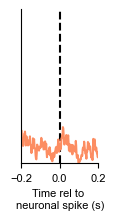

In [8]:
fig,ax = plt.subplots(figsize=(1,2))
ax.plot(t_ar,supp,color=sns.color_palette('Set2')[1])
ax.set(xlim=[-0.2,0.2],xlabel='Time rel to \nneuronal spike (s)',ylim=[-3,16],yticks=[])
ax.axvline(0,color='k',linestyle='--',zorder=-500)


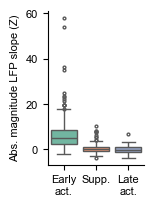

In [9]:
res = pd.read_csv(f'{source_path}/quant_slope.csv')
fig,ax = plt.subplots(figsize=(1.25,2))

sns.boxplot(x='k_mean',y='deriv_val_z',data=res,ax=ax,palette='Set2',flierprops=dict(marker='o', markersize=2))
ax.set(ylabel='Abs. magnitude LFP slope (Z)',xticklabels=['Early\nact.','Supp.','Late\nact.'],xlabel='',)
res.to_csv('./statistical_source/ED8/paneld.csv')


In [13]:
res

,Unnamed: 0,lfp_avg,deriv_avg,k_mean,wv_form,deriv_val,z_scored_deriv,deriv_val_z
0,0,[ 4.38022013e-02 4.54358456e-02 3.38769447e-...,[1.22662057 1.231164 1.22546072 1.22613445 1...,1.0,RS,1.260351,[ 3.37102544e-01 5.06088096e-01 2.93963617e-...,1.591654
1,1,[-1.77626434e-01 -1.57356760e-01 -8.01919896e-...,[1.23922533 1.24129832 1.26525864 1.22574762 1...,2.0,RS,1.213707,[-0.33127405 -0.26158763 0.54387179 -0.784346...,-1.189118
2,2,[-0.10717459 -0.15853202 -0.21381197 -0.240388...,[1.11545328 1.11723171 1.13970325 1.16245667 1...,2.0,FS,1.089952,[-1.0929823 -1.02989473 -0.23274408 0.574405...,-1.997618
3,3,[-9.11381244e-01 -8.01197895e-01 -7.04472753e-...,[1.18526008 1.212985 1.21926261 1.22004622 1...,3.0,FS,1.116332,[-1.43622955 -0.88881565 -0.76486756 -0.749395...,-2.797185
4,4,[-2.75655927e-01 -2.99191159e-01 -3.20555561e-...,[1.13622111 1.13000087 1.13596028 1.13153297 1...,3.0,FS,1.098542,[-0.25511965 -0.57380782 -0.26848322 -0.495312...,-2.185587
...,...,...,...,...,...,...,...,...
700,112,[-4.84823910e-01 -5.69327597e-01 -5.87492919e-...,[1.53503358 1.55274991 1.54258928 1.60714905 1...,1.0,FS,1.952477,[-5.16748906e-01 -1.82744406e-01 -3.74301932e-...,7.353267
701,113,[ -2.73107583 -2.61642581 -2.52633259 -2.47...,[1.58597553 1.49164352 1.59925045 1.5972542 1...,1.0,FS,2.112052,[ 1.23465266e+00 -6.70559212e-01 1.50276453e+...,11.859751
702,114,[-7.88851640e-01 -7.04641253e-01 -6.33036610e-...,[1.4752744 1.47102777 1.54843193 1.47533976 1...,1.0,FS,1.773046,[-1.21408570e+00 -1.31099331e+00 4.55361118e-...,5.581031
703,115,[ 6.66973216e-01 6.62877626e-01 6.21052323e-...,[1.55176667 1.4880978 1.51781572 1.52763461 1...,2.0,Other,1.504667,[ 1.11522297e+00 -1.32974610e+00 -1.88538797e-...,-0.693464


In [15]:
from scipy.stats import mannwhitneyu
mannwhitneyu(res[res.k_mean == 1].deriv_val_z.values,
             res[res.k_mean == 2].deriv_val_z.values)

MannwhitneyuResult(statistic=61755.0, pvalue=4.101586999026278e-52)

In [16]:
from scipy.stats import mannwhitneyu
mannwhitneyu(res[res.k_mean == 1].deriv_val_z.values,
             res[res.k_mean == 3].deriv_val_z.values)

MannwhitneyuResult(statistic=44118.0, pvalue=1.5655740338288532e-47)

In [19]:
print(np.sum(res.k_mean == 1))
print(np.sum(res.k_mean == 2))
print(np.sum(res.k_mean == 3))

279
251
175


[Text(0, 0.5, 'LFP (uV)'), Text(0.5, 0, 'Time rel. to IED (s)')]

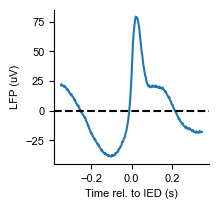

In [7]:
d = np.load(f'{source_path}/ied_schem.npz')
avg_ied=d['avg_ied']
t_ar=d['t_ar']
fig,ax = plt.subplots(figsize=(2,2))
#77 good
#ax.plot(d_ieds[77])
ax.plot(t_ar,avg_ied)#d_ieds.mean(0)[40:300])
ax.axhline(0,color='k',linestyle='--')
ax.set(ylabel = 'LFP (uV)',xlabel='Time rel. to IED (s)')
